In [2]:
# algorithms from scratch

In [11]:
## K nearest neighbors
import numpy as np
from collections import Counter
class KNN:
    def __init__(self, k = 3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions
    
    def _predict(self, x):
        # compute distances between x and all examples in the training set
        distances = [np.sqrt(np.sum((x_train - x) ** 2)) for x_train in self.X_train]
        # sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]
        # extract the labels of the k nearest neighbor
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # return the most common class label
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]




In [ ]:
# !pip install scikit-learn
# !pip install matplotlib

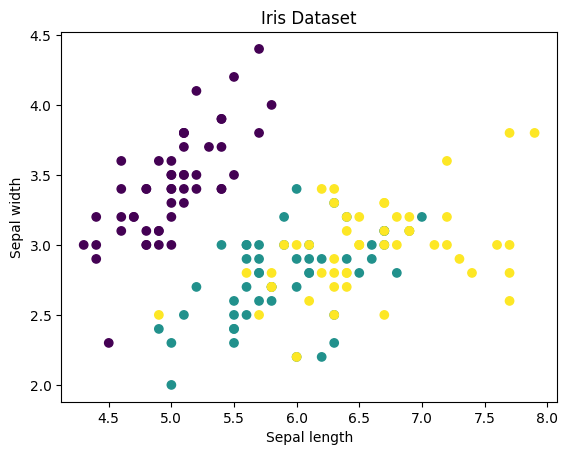

In [9]:
# load iris dataset


import numpy as np
import matplotlib.pyplot as plt 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

# plot the dataset
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris Dataset')
plt.show()

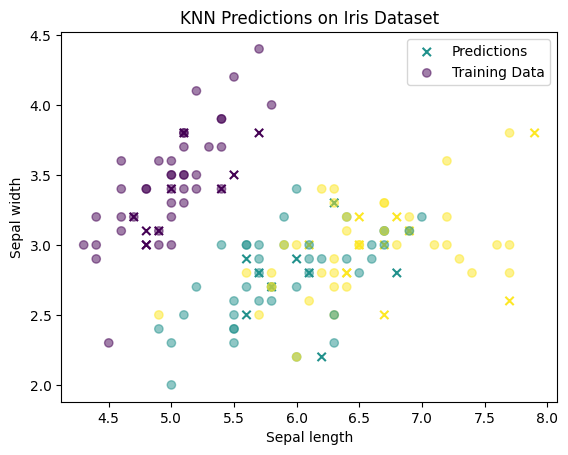

In [23]:
model = KNN(k=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# plot the predictions with x marker along with data points
plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions, cmap='viridis', marker='x')
# also plot the original data points with dot markers   
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', marker='o', alpha=0.5)
# add labels and title
plt.legend(['Predictions', 'Training Data'])
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('KNN Predictions on Iris Dataset')
plt.show()

In [24]:
X_test,predictions

(array([[6.1, 2.8, 4.7, 1.2],
        [5.7, 3.8, 1.7, 0.3],
        [7.7, 2.6, 6.9, 2.3],
        [6. , 2.9, 4.5, 1.5],
        [6.8, 2.8, 4.8, 1.4],
        [5.4, 3.4, 1.5, 0.4],
        [5.6, 2.9, 3.6, 1.3],
        [6.9, 3.1, 5.1, 2.3],
        [6.2, 2.2, 4.5, 1.5],
        [5.8, 2.7, 3.9, 1.2],
        [6.5, 3.2, 5.1, 2. ],
        [4.8, 3. , 1.4, 0.1],
        [5.5, 3.5, 1.3, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.1, 3.8, 1.5, 0.3],
        [6.3, 3.3, 4.7, 1.6],
        [6.5, 3. , 5.8, 2.2],
        [5.6, 2.5, 3.9, 1.1],
        [5.7, 2.8, 4.5, 1.3],
        [6.4, 2.8, 5.6, 2.2],
        [4.7, 3.2, 1.6, 0.2],
        [6.1, 3. , 4.9, 1.8],
        [5. , 3.4, 1.6, 0.4],
        [6.4, 2.8, 5.6, 2.1],
        [7.9, 3.8, 6.4, 2. ],
        [6.7, 3. , 5.2, 2.3],
        [6.7, 2.5, 5.8, 1.8],
        [6.8, 3.2, 5.9, 2.3],
        [4.8, 3. , 1.4, 0.3],
        [4.8, 3.1, 1.6, 0.2]]),
 [np.int64(1),
  np.int64(0),
  np.int64(2),
  np.int64(1),
  np.int64(1),
  np.int64(0),
  np.int

In [25]:
# calculate accuracy
accuracy = np.sum(predictions == y_test) / len(y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 100.00%


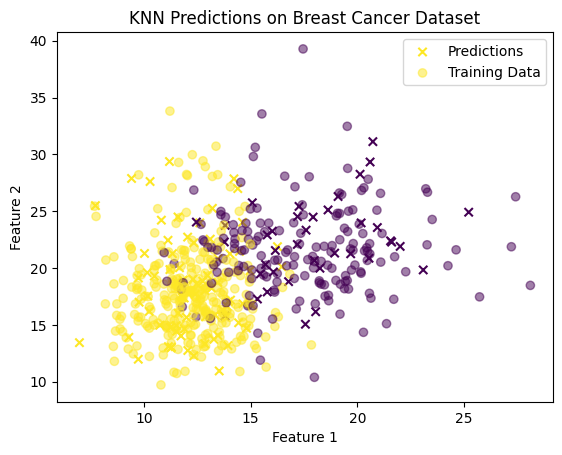

In [26]:
# get some other dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = KNN(k=5)
model.fit(X_train, y_train)
predictions = model.predict(X_test) 

# plot the predictions with x marker along with data points
plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions, cmap='viridis', marker='x')
# also plot the original data points with dot markers   
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', marker='o', alpha=0.5)
# add labels and title
plt.legend(['Predictions', 'Training Data'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN Predictions on Breast Cancer Dataset')
plt.show()